# Regression 
## Student Performance Data Set
https://www.kaggle.com/datasets/kukuroo3/student-performance-data-set-competition-form/data

### About Dataset
#### Dataset Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

#### Attribute Info.

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
from glob import glob 

for g in glob('./data/student_performance2/*.csv'):
    print(g)

./data/student_performance2/X_train.csv
./data/student_performance2/y_train.csv
./data/student_performance2/X_test.csv


In [2]:
import pandas as pd

df_x_train = pd.read_csv('./data/student_performance2/x_train.csv')
df_x_test = pd.read_csv('./data/student_performance2/x_test.csv')
df_y_train = pd.read_csv('./data/student_performance2/y_train.csv')

display(df_x_train)
display(df_x_test)
display(df_y_train)

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,...,no,4,3,3,1,1,3,0,14,13
1,1254,GP,F,17,U,GT3,T,4,3,health,...,yes,4,4,3,1,3,4,0,13,15
2,1639,GP,F,16,R,GT3,T,4,4,health,...,no,2,4,4,2,3,4,6,10,11
3,1118,GP,M,16,U,GT3,T,4,4,services,...,no,5,3,3,1,3,5,0,15,13
4,1499,GP,M,19,U,GT3,T,3,2,services,...,yes,4,5,4,1,1,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1074,GP,M,15,U,GT3,T,4,4,services,...,no,5,3,3,1,1,5,4,10,13
674,1044,GP,M,15,R,GT3,T,4,4,other,...,yes,1,3,5,3,5,1,8,12,10
675,1078,GP,M,17,U,LE3,T,4,4,other,...,no,4,1,1,2,2,5,0,12,13
676,1055,MS,M,17,R,GT3,T,1,1,other,...,yes,4,5,5,1,3,2,0,10,9


,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1000,GP,F,16,U,GT3,T,4,2,services,...,no,4,2,3,1,1,5,2,15,16
1,1008,GP,M,19,U,GT3,T,1,2,other,...,no,4,5,2,2,2,4,3,13,11
2,1013,GP,F,16,U,GT3,T,4,4,services,...,no,3,2,3,1,2,2,6,13,14
3,1014,GP,F,16,U,GT3,T,3,1,services,...,no,4,3,3,1,2,5,4,7,7
4,1017,GP,F,15,U,LE3,A,3,4,other,...,yes,5,3,2,1,1,1,0,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2032,GP,F,15,R,LE3,T,3,1,other,...,no,4,4,2,2,3,3,6,15,15
362,2034,GP,M,17,U,GT3,T,3,3,services,...,yes,4,3,4,2,3,4,12,12,12
363,2035,GP,F,16,U,GT3,T,2,3,services,...,no,2,3,1,1,1,3,2,16,16
364,2036,MS,F,16,U,GT3,T,3,1,other,...,no,3,1,3,1,3,1,0,8,6


,StudentID,G3
0,1714,14
1,1254,15
2,1639,11
3,1118,13
4,1499,0
...,...,...
673,1074,14
674,1044,11
675,1078,13
676,1055,10


In [3]:
# EDA
## check for missing values
print(df_x_train.isnull().sum().sum())
print(df_x_test.isnull().sum().sum())
print(df_y_train.isnull().sum().sum())

0
0
0


In [4]:
# check for duplicates
print(df_x_train.duplicated().sum())
print(df_x_test.duplicated().sum())
print(df_y_train.duplicated().sum())

0
0
0


In [5]:
# check for data types
print(df_x_train.dtypes)
print(df_x_test.dtypes)
print(df_y_train.dtypes)

StudentID      int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
dtype: object
StudentID      int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64

In [6]:
# 사용하기 어려운 데이터는 제거

difficult_columns = ['Mjob', 'Fjob']

df_x_train.drop(columns=difficult_columns, inplace=True)
df_x_test.drop(columns=difficult_columns, inplace=True)

# 데이터 타입을 숫자로 변환 (One-hot encoding)

one_hot_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

df_x_train = pd.concat([df_x_train, pd.get_dummies(df_x_train[one_hot_columns], drop_first=True) ], axis=1)
df_x_test = pd.concat([df_x_test, pd.get_dummies(df_x_test[one_hot_columns], drop_first=True) ], axis=1)

df_x_train.drop(columns=one_hot_columns + ['StudentID'], inplace=True)
df_x_test.drop(columns=one_hot_columns + ['StudentID'], inplace=True)
df_y_train.drop(columns=['StudentID'], inplace=True)

display(df_x_train)
display(df_x_test)


,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,1,4,0,4,3,3,1,1,3,...,False,False,False,True,True,False,True,True,True,False
1,17,1,3,0,4,4,3,1,3,4,...,True,False,False,True,True,True,True,True,True,True
2,16,1,2,0,2,4,4,2,3,4,...,True,False,False,True,False,True,True,True,False,False
3,16,1,3,0,5,3,3,1,3,5,...,True,False,False,True,False,True,True,True,True,False
4,19,1,1,3,4,5,4,1,1,4,...,True,False,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,15,1,1,0,5,3,3,1,1,5,...,True,False,False,True,False,True,False,True,True,False
674,15,4,4,0,1,3,5,3,5,1,...,False,False,False,True,False,True,True,True,True,True
675,17,2,1,0,4,1,1,2,2,5,...,False,False,False,False,False,False,True,True,True,False
676,17,2,1,0,4,5,5,1,3,2,...,True,False,False,True,False,True,False,True,True,True


,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,1,2,0,4,2,3,1,1,5,...,True,False,False,True,False,False,True,True,True,False
1,19,1,2,1,4,5,2,2,2,4,...,False,True,False,False,False,False,False,True,True,False
2,16,1,3,0,3,2,3,1,2,2,...,True,False,False,True,True,True,True,True,True,False
3,16,1,4,0,4,3,3,1,2,5,...,True,False,True,True,True,False,True,True,True,False
4,15,1,2,0,5,3,2,1,1,1,...,True,False,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,15,2,4,0,4,4,2,2,3,3,...,False,False,False,True,False,False,False,True,True,False
362,17,1,2,0,4,3,4,2,3,4,...,True,False,False,True,False,True,True,True,True,True
363,16,1,2,0,2,3,1,1,1,3,...,True,False,True,False,False,False,True,True,True,False
364,16,1,1,0,3,1,3,1,3,1,...,True,False,False,False,False,True,True,True,True,False


In [7]:
df_x_train.dtypes

age                  int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
reason_home           bool
reason_other          bool
reason_reputation     bool
guardian_mother       bool
guardian_other        bool
schoolsup_yes         bool
famsup_yes            bool
paid_yes              bool
activities_yes        bool
nursery_yes           bool
higher_yes            bool
internet_yes          bool
romantic_yes          bool
dtype: object

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_x_train = pd.DataFrame(scaler.fit_transform(df_x_train), columns=df_x_train.columns)
df_x_test = pd.DataFrame(scaler.transform(df_x_test), columns=df_x_test.columns)


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_x_train, df_y_train)
lr.score(df_x_train, df_y_train)

0.8522742797983812

In [10]:
df_y_test = pd.read_csv('./data/student_performance2/test_label/y_test.csv')
df_y_test.drop(columns=['StudentID'], inplace=True)
lr.score(df_x_test, df_y_test)

0.8088382066827844

In [11]:
# G1를 뺴고 예측해보기

df_x_train.drop(columns=['G2'], inplace=True)
df_x_test.drop(columns=['G2'], inplace=True)

lr = LinearRegression()
lr.fit(df_x_train, df_y_train)
print(lr.score(df_x_train, df_y_train))
print(lr.score(df_x_test, df_y_test))


0.6874054858369361
0.6289694715653344


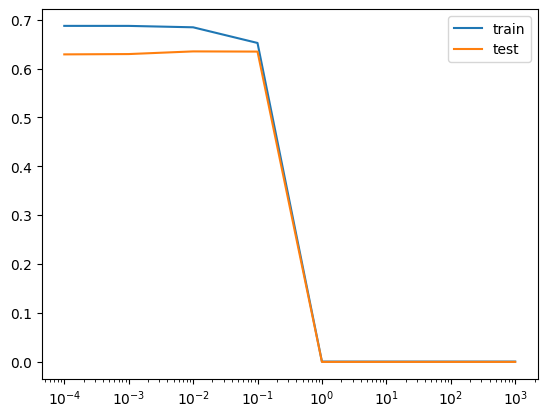

In [12]:
# 너무 컬럼이 많은게 아닐까? 

from sklearn.linear_model import Lasso


train_scores_por = []
test_scores_por = []

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(df_x_train, df_y_train)
    train_scores_por.append(lasso.score(df_x_train, df_y_train))
    test_scores_por.append(lasso.score(df_x_test, df_y_test))
    
import matplotlib.pyplot as plt

plt.plot(alphas, train_scores_por, label='train')
plt.plot(alphas, test_scores_por, label='test')
plt.xscale('log')
plt.legend()
plt.show()

In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(df_x_train, df_y_train)
print(lasso.score(df_x_train, df_y_train))
print(lasso.score(df_x_test, df_y_test))


0.6524078979403327
0.6347477927941687


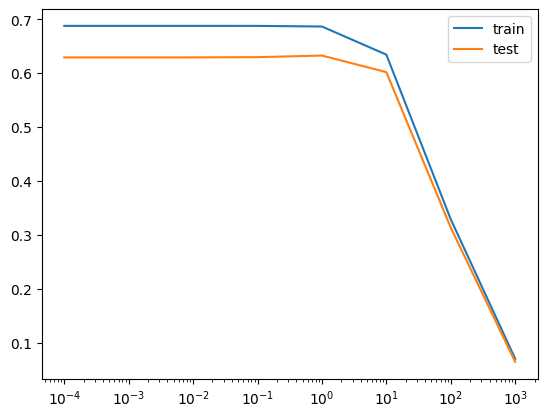

In [14]:
# Ridge

from sklearn.linear_model import Ridge

train_scores_por = []
test_scores_por = []

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(df_x_train, df_y_train)
    train_scores_por.append(ridge.score(df_x_train, df_y_train))
    test_scores_por.append(ridge.score(df_x_test, df_y_test))
    
import matplotlib.pyplot as plt

plt.plot(alphas, train_scores_por, label='train')
plt.plot(alphas, test_scores_por, label='test')
plt.xscale('log')
plt.legend()
plt.show()

In [15]:
ridge = Ridge(alpha=10)

ridge.fit(df_x_train, df_y_train)
print(ridge.score(df_x_train, df_y_train))
print(ridge.score(df_x_test, df_y_test))

0.6340980784462014
0.6016910151465724


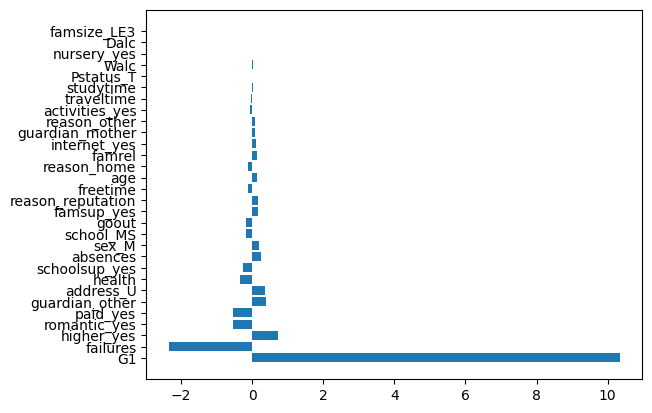

In [17]:
# ridge feature importance visualization 
## 절대값이 큰 것들만 보기
## 절대값이 큰 순서대로 정렬

import numpy as np

sorted_idx = np.argsort(np.abs(ridge.coef_[0]))[::-1]

plt.barh(df_x_train.columns[sorted_idx], ridge.coef_[0][sorted_idx])
plt.show()


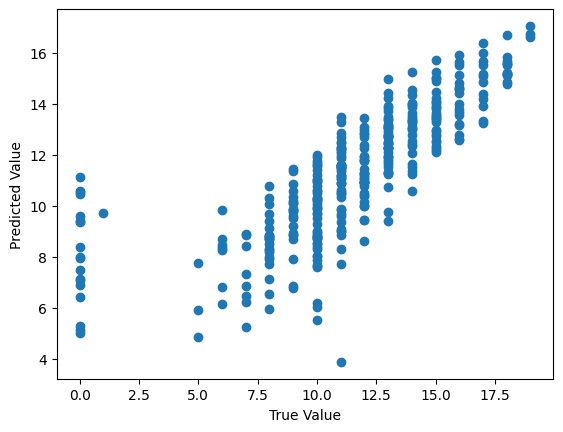

In [18]:
# x 축은 실제값 y축은 예측값으로 하는 scatter plot

plt.scatter(df_y_test, ridge.predict(df_x_test))
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [19]:
# XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(df_x_train, df_y_train)
print(xgb.score(df_x_train, df_y_train))
print(xgb.score(df_x_test, df_y_test))


0.9989853443620688
0.6349750491332715


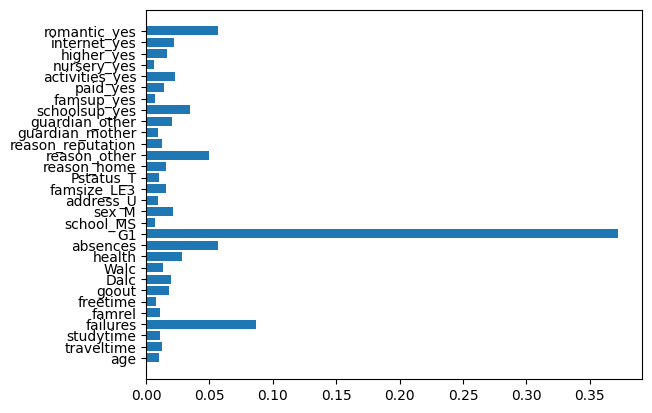

In [20]:
# x축에는 feature의 중요도, y축에는 feature의 이름

import matplotlib.pyplot as plt

plt.barh(df_x_train.columns, xgb.feature_importances_)
plt.show()